In [174]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1 {color: #3636ff; font-family:'Orbitron' ; text-shadow: 5px 5px 5px #aaa;}
a {color: #3636ff;}
div.output_area pre , div.output_area html {font-size:110%; color: #3636ff;}     
</style>

## For creating posts

# When you need to select all segments 
# satisfying the condition
Jupyter Notebook & Python Kernel

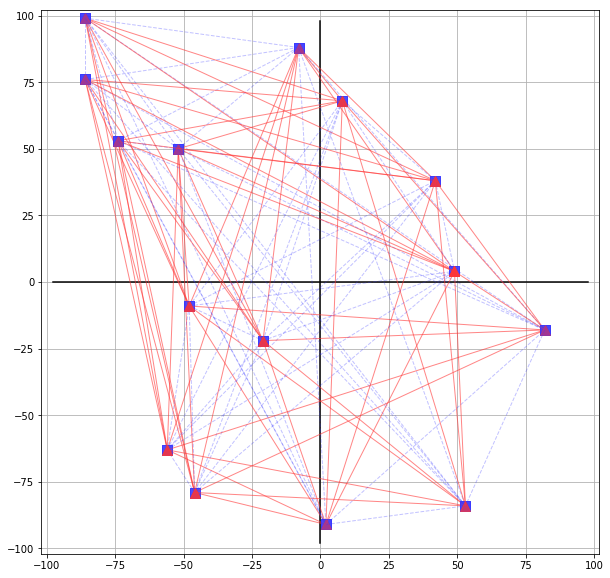

In [47]:
import numpy, pylab as plt
N = 15; A = numpy.random.randint(-100,100,(N,2))
plt.figure(figsize=(10,10)); plt.grid(); plt.xlim(-102,102); plt.ylim(-102,102)
plt.axhline(0,0.02,0.98,c='black'); plt.axvline(0,0.02,0.98,c='black')
for i in range(N):
    for j in range(i+1,N):
        condition = (A[i][0]*A[i][1]>0)&(A[j][0]*A[j][1]<0) or \
                    (A[i][0]*A[i][1]<0)&(A[j][0]*A[j][1]>0)
        if condition: 
            ls='-'; c='#ff3636'; alpha=0.6; marker='^'
        else:
            ls='--'; c='#3636ff'; alpha=0.3; marker='s'
        plt.plot([A[i][0],A[j][0]],[A[i][1],A[j][1]],'-o',ms=10,lw=1,
                 marker=marker,alpha=alpha,ls=ls,c=c) 

# When you think it's hard to check your decision
# Not this time... Not with calculus
Jupyter Notebook & Python Kernel

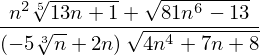

In [90]:
import sympy, time
sympy.init_printing(use_unicode=True)
n = sympy.symbols('n')
a = (n**2*sympy.root(13*n+1,5)+sympy.sqrt(81*n**6-13))/\
    ((2*n-5*sympy.cbrt(n))*sympy.sqrt(4*n**4+7*n+8))
a

In [91]:
start_time = time.time()
sympy.limit(a,n,sympy.S.Infinity).n()
print('%s seconds' % (time.time()-start_time))

0.008799076080322266 seconds


In [92]:
sympy.limit(a,n,sympy.S.Infinity).n()

# If you think processing images is a hard task
# Think again
Jupyter Notebook & Python Kernel

Image Link 

https://github.com/OlgaBelitskaya/deep_learning_projects/blob/master/DL_PP0/data/flower_images/0006.png

          (128, 128, 3)           (128, 128, 1)


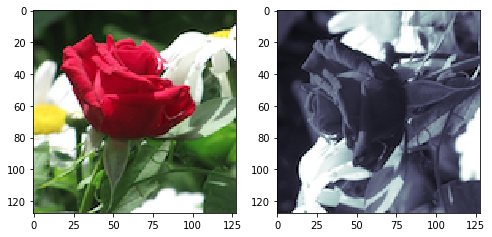

In [180]:
import pylab, keras
from keras.preprocessing import image as keras_image
path = "../deep_learning_projects/DL_PP0/data/flower_images/"; file = "0006.png"
def display_img(f,s=128):
    img = keras_image.load_img(f,target_size=(s,s)) 
    img = keras_image.img_to_array(img)/255 
    grey_img = keras_image.load_img(f,color_mode="grayscale",target_size=(s,s))
    grey_img = keras_image.img_to_array(grey_img) 
    fig = pylab.figure(figsize=(8,4)) 
    ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
    ax1.imshow(img); ax2.imshow(grey_img.reshape(s,s).T,cmap=pylab.cm.bone)
    print(9*' ',img.shape,9*' ',grey_img.shape)
display_img(path+file)

# If you think creating neural networks 
# is something special... Not at all...
Jupyter Notebook & Python Kernel

One classic example of labeling with a very simple network

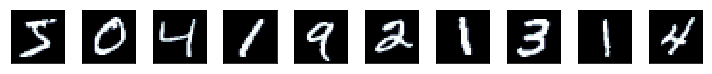

In [9]:
import pylab, keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
fig,ax = pylab.subplots(figsize=(10,2),nrows=1,ncols=10,sharex=True,sharey=True,)
ax = ax.flatten(); ax[0].set_xticks([]); ax[0].set_yticks([])
[ax[i].imshow(x_train[i].reshape(28,28),cmap=pylab.cm.bone) for i in range(10)]
pylab.tight_layout(); pylab.gcf();
x_train,x_test = x_train.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)
y_train,y_test = keras.utils.to_categorical(y_train),keras.utils.to_categorical(y_test)
n = int(len(x_test)/2)
x_valid,y_valid = x_test[:n],y_test[:n]; x_test,y_test = x_test[n:],y_test[n:]

In [12]:
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,GlobalMaxPooling2D
from keras.layers.advanced_activations import LeakyReLU; from keras.models import Sequential
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
def model():
    model = Sequential()    
    model.add(Conv2D(28,(5,5),padding='same',input_shape=(28,28,1)))
    model.add(LeakyReLU(alpha=0.02))
    model.add(MaxPooling2D(pool_size=(2,2))); model.add(Dropout(0.2))
    model.add(Conv2D(96,(5,5))); model.add(LeakyReLU(alpha=0.02))    
    model.add(MaxPooling2D(pool_size=(2,2))); model.add(Dropout(0.2))
    model.add(GlobalMaxPooling2D()); model.add(Dense(512)) 
    model.add(LeakyReLU(alpha=0.02)); model.add(Dropout(0.5))     
    model.add(Dense(10)); model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])    
    return model
model = model()
checkpointer = ModelCheckpoint(filepath='weights.digits.hdf5',save_best_only=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss',patience=5,verbose=0,factor=0.5)
model.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_valid,y_valid),
          verbose=0,callbacks=[checkpointer,lr_reduction]);

In [13]:
model.load_weights('weights.digits.hdf5')
print("accuracy: %.2f%%" % (model.evaluate(x_test,y_test)[1]*100))

5000/5000 [==============================] - 4s 706us/step
accuracy: 99.58%


## Additional material

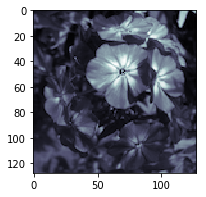

In [156]:
grey_img = img[...,1]
fig = pylab.figure(figsize=(3,3)); ax = fig.add_subplot(111) 
ax.imshow(grey_img,cmap=pylab.cm.bone);

In [95]:
import pandas
data = pandas.read_csv("../deep_learning_projects/DL_PP0/data/flower_images/flower_labels.csv")
data.head()

,file,label
0,0001.png,0
1,0002.png,0
2,0003.png,2
3,0004.png,0
4,0005.png,0
